In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### vaihdetaan Gender-columnin arvot Stringeistä Int. Jotta voidaan käsitellä niitä.

In [3]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [4]:
 
X = df.iloc[:, [2, 4]].values

X


array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

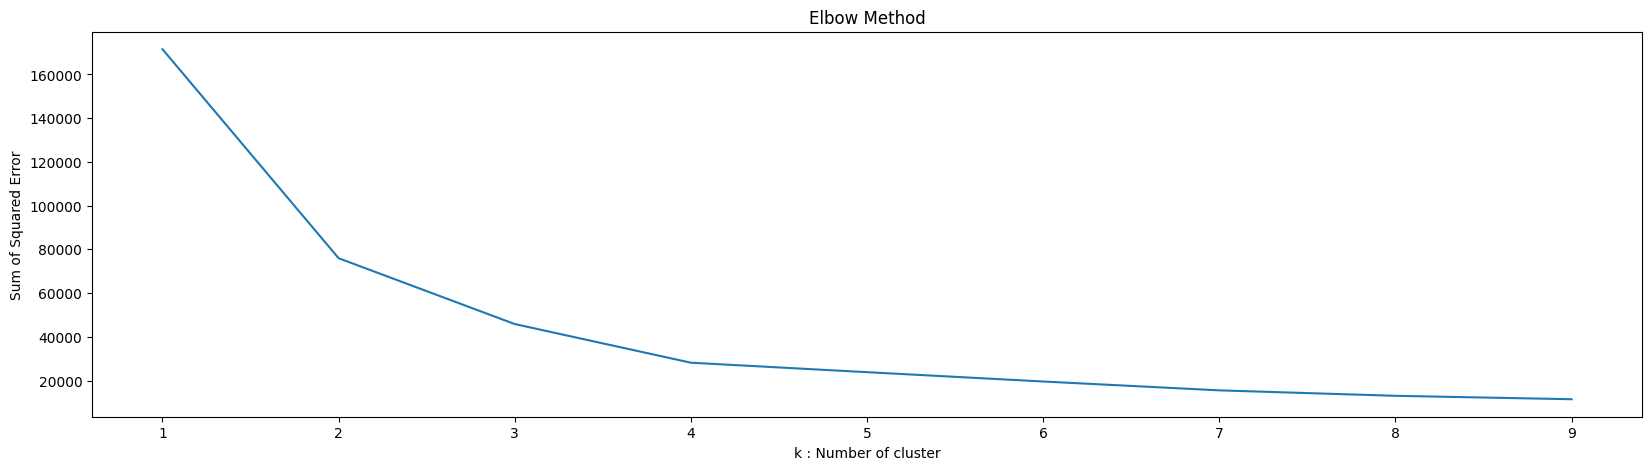

In [5]:
sse = {}
kmax = 10

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

# Plotting
plt.figure(figsize=(20,5))
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.show()

In [6]:
#init_centers = [[4.5, 4], [7.5, 4], [4.5, 2]]
init_centers = [ [40, 20]   ,   [20, 50]   ,   [40, 90]  , [80, 50]  ]
init_centers = np.array(init_centers)



In [7]:
def plot_my_cluster(kmeans_object, init_centers):# Plot the identified clusters and compare
    fig, axes = plt.subplots(1, 2, figsize=(12,7))
    axes[0].scatter(X[:, 0], X[:, 1], c='g', cmap='gist_rainbow', edgecolor='k', s=150)
    axes[1].scatter(X[:, 0], X[:, 1], c=kmean.labels_, cmap='jet', edgecolor='k', s=150)
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Spending Score (1-100)')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Spending Score (1-100)')
    axes[0].set_title('alkuperainen')
    axes[1].set_title('arvioitu')




    axes[0].scatter(init_centers[:,0], init_centers[:,1], c='r')
    axes[1].scatter(kmeans_object.cluster_centers_[:,0], kmeans_object.cluster_centers_[:,1], c='r')

In [8]:
#kmean.cluster_centers_

In [9]:
init_centers

array([[40, 20],
       [20, 50],
       [40, 90],
       [80, 50]])

C:\Users\Omistaja\AppData\Local\Temp\ipykernel_10096\3300181169.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:, 0], X[:, 1], c='g', cmap='gist_rainbow', edgecolor='k', s=150)
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_10096\3300181169.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:, 0], X[:, 1], c='g', cmap='gist_rainbow', edgecolor='k', s=150)
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_10096\3300181169.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:, 0], X[:, 1], c='g', cmap='gist_rainbow', edgecolor='k', s=150)


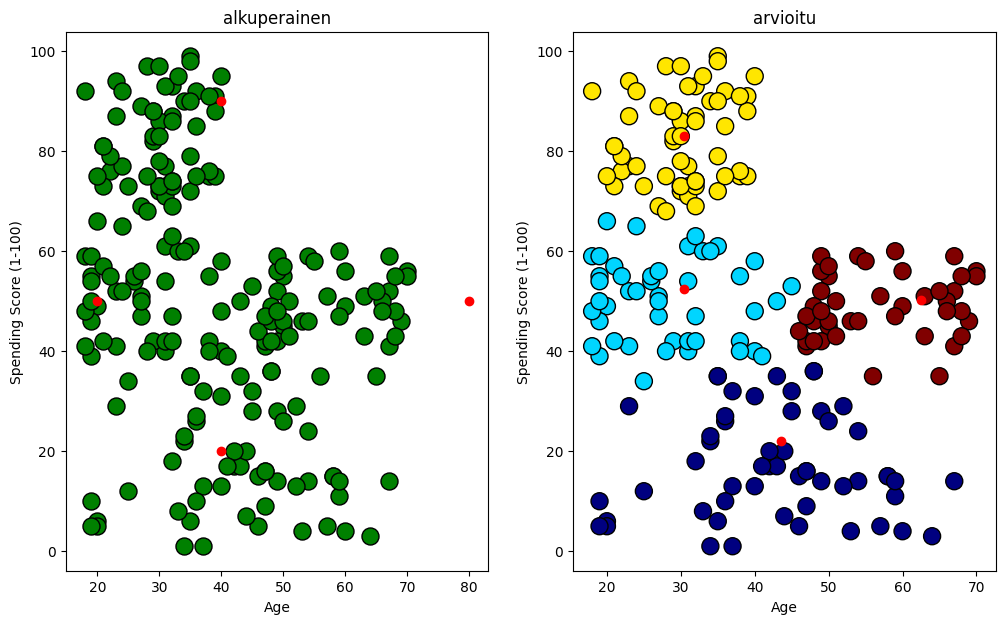

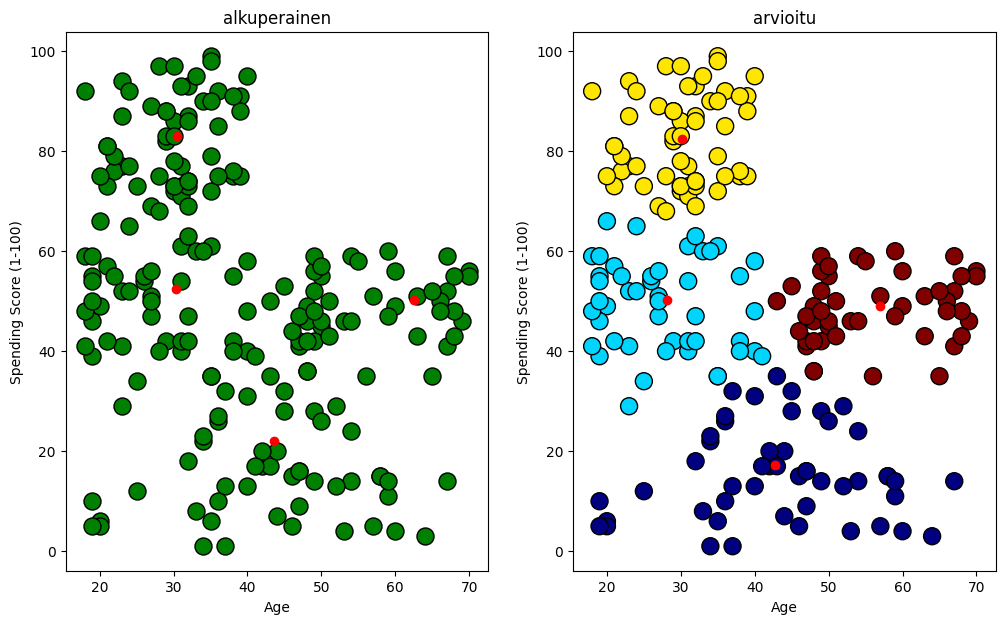

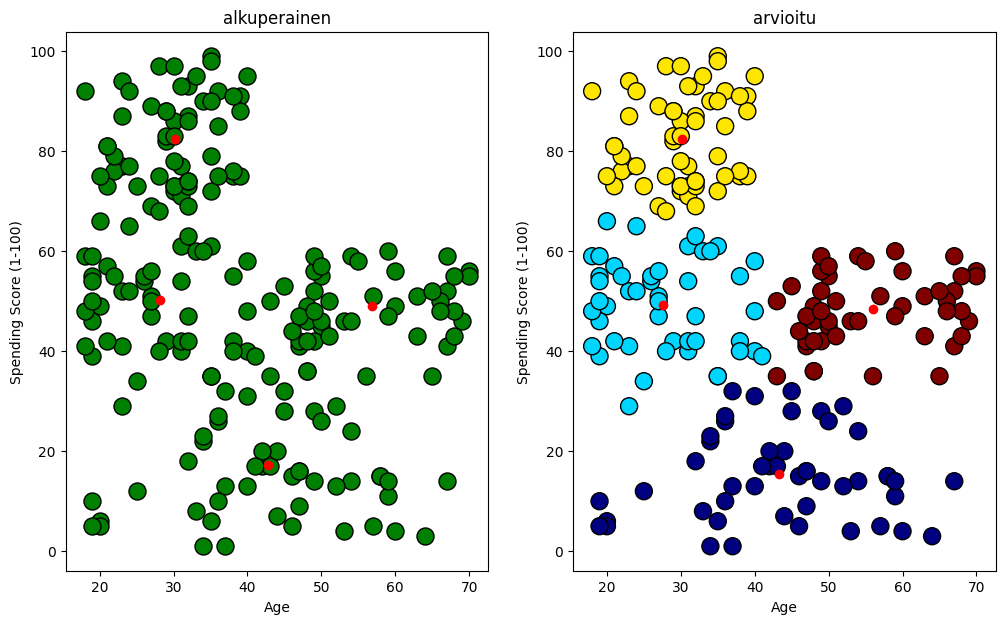

In [10]:
#init_centers = [[4.5, 4], [7.5, 4], [4.5, 2]]
init_centers = [   [40, 20]   ,   [20, 50]   ,   [40, 90]  , [80, 50]   ]
init_centers = np.array(init_centers)

kmean = KMeans(n_clusters = 4, random_state=None, max_iter=0, n_init = 1)


for i in range(3):
    #kmean = KMeans(n_clusters = 3, random_state=None, max_iter=1, n_init = 1, init ='random')
    kmean = KMeans(n_clusters = 4, random_state=None, max_iter=1, n_init = 1, init = init_centers)
    kmean.fit(X)
    plot_my_cluster(kmean, init_centers)
    init_centers=kmean.cluster_centers_



In [11]:
kmean.inertia_

28180.8774636585

In [12]:
point_to_be_predicted=np.array([[7.5,2]])

In [13]:
kmean.predict(point_to_be_predicted)

array([0])

In [14]:
kmean.cluster_centers_

array([[43.28571429, 15.42857143],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.9787234 , 48.5106383 ]])

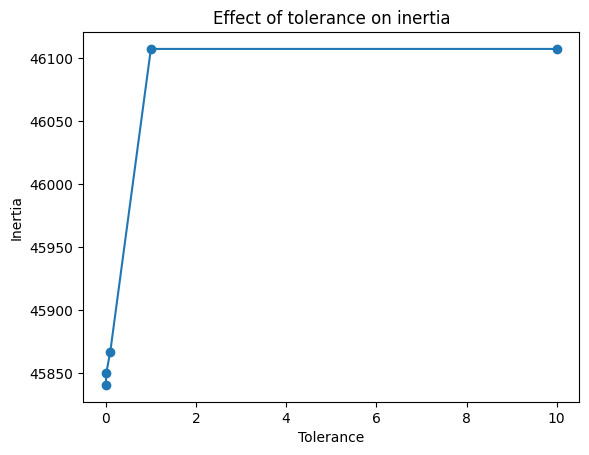

In [15]:

tolerances = [10, 1, 0.1, 0.01, 0.001]
inertias = []

for tol in tolerances:
    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=tol, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.plot(tolerances, inertias, marker='o')
plt.title('Effect of tolerance on inertia')
plt.xlabel('Tolerance')
plt.ylabel('Inertia')
plt.show()

In [20]:
times = []
for tol in tolerances:
    start_time = time.time()
    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=tol, random_state=0)
    kmeans.fit(X)
    end_time = time.time()
    times.append(end_time - start_time)

# Print the results
for tol, runtime in zip(tolerances, times):
    print(f'Tolerance: {tol}, Runtime: {runtime} seconds')

Tolerance: 10, Runtime: 0.029844045639038086 seconds
Tolerance: 1, Runtime: 0.022414207458496094 seconds
Tolerance: 0.1, Runtime: 0.023633241653442383 seconds
Tolerance: 0.01, Runtime: 0.030548572540283203 seconds
Tolerance: 0.001, Runtime: 0.02618265151977539 seconds
